<h1 align = "center">Are Yelp reviews gendered ?</h1>

In [1]:
%matplotlib inline 

In [2]:
import json
import pyprind
import collections
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
# load gender detector

from gender_detector import GenderDetector 
detector = GenderDetector('us')

In [4]:
# load all users

users = {}

with open("../yelp_dataset/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json", "rb") as f:
    for line in f:
        user = json.loads(line.strip())
        users[user['user_id']] = user

In [7]:
# detect all names' gender

name_set = set()

for user in users.values():
    name_set.add(user['name'])

bar = pyprind.ProgBar(len(name_set), width = 80)

# set mapping
gender = {}

for name in name_set:
    bar.update()
    try:
        gender[name] = detector.guess(name)
    except:
        gender[name] = 'unknown'

0%                                                                            100%
[################################################################################] | ETA: 00:00:00
Total time elapsed: 00:29:55


In [8]:
# save to file

with open("gender.json", "wb") as f:
    json.dump(gender, f)

In [9]:
with open("gender.json", "rb") as f:
    gender = json.load(f)

In [10]:
# assign gender to users

for user in users.values():
    try:
        user['gender'] = gender[user['name']]
    except:
        user['gender'] = 'unknown'

In [11]:
gender_list = [user['gender'] for user in users.values()]

print "total number of users is", len(gender_list)

total number of users is 552339


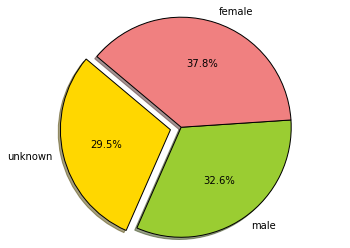

In [12]:
counter=collections.Counter(gender_list)

labels = counter.keys()
sizes = counter.values()
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [13]:
reviews = []
with open("../yelp_dataset/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "rb") as f:
    for line in f:
        reviews.append(json.loads(line.strip()))

In [14]:
bar = pyprind.ProgBar(len(reviews), width = 80)

for review in reviews:
    bar.update()
    review['text_blob'] = TextBlob(review['text'])

0%                                                                            100%
[################################################################################] | ETA: 00:00:00
Total time elapsed: 00:02:14


In [15]:
m_reviews = []
f_reviews = []
for review in reviews:
    user = users[review['user_id']]
    if user['gender'] == 'male':
        m_reviews.append(review)
    elif user['gender'] == 'female':
        f_reviews.append(review)

In [16]:
reviews[1]

{u'business_id': u'5UmKMjUEUNdYWqANhGckJw',
 u'date': u'2014-02-13',
 u'review_id': u'KPvLNJ21_4wbYNctrOwWdQ',
 u'stars': 5,
 u'text': u"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",
 'text_blob': TextBlob("Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition."),
 u'type': u'review',
 u'user_id': u'Iu6AxdBYGR4A0wspR9BYHA',
 u'votes': {u'cool': 0, u'funny': 0, u'useful': 0}}

In [24]:
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.words

WordList(['The', 'titular', 'threat', 'of', 'The', 'Blob', 'has', 'always', 'struck', 'me', 'as', 'the', 'ultimate', 'movie', 'monster', 'an', 'insatiably', 'hungry', 'amoeba-like', 'mass', 'able', 'to', 'penetrate', 'virtually', 'any', 'safeguard', 'capable', 'of', 'as', 'a', 'doomed', 'doctor', 'chillingly', 'describes', 'it', 'assimilating', 'flesh', 'on', 'contact', 'Snide', 'comparisons', 'to', 'gelatin', 'be', 'damned', 'it', "'s", 'a', 'concept', 'with', 'the', 'most', 'devastating', 'of', 'potential', 'consequences', 'not', 'unlike', 'the', 'grey', 'goo', 'scenario', 'proposed', 'by', 'technological', 'theorists', 'fearful', 'of', 'artificial', 'intelligence', 'run', 'rampant'])

<h1 align = "center">Text Analysis</h1>

### 1. Number of words

In [17]:
def num_words_dist(review_set):
    
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []

    for review in review_set:
        bar.update()
        n = len(review['text'].split(" "))
        ret.append(n)
    return ret

m_num_word_dist = num_words_dist(m_reviews)
f_num_word_dist = num_words_dist(f_reviews)

0%                                                                            100%
[################################################################################] | ETA: 00:00:00
Total time elapsed: 00:00:45
0%                                                                            100%
[################################################################################] | ETA: 00:00:00
Total time elapsed: 00:00:18


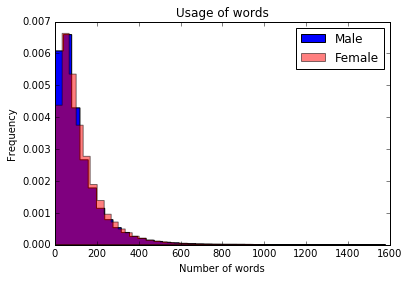

In [18]:
plt.hist(m_num_word_dist, bins=40, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist(f_num_word_dist, bins=40, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of words")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

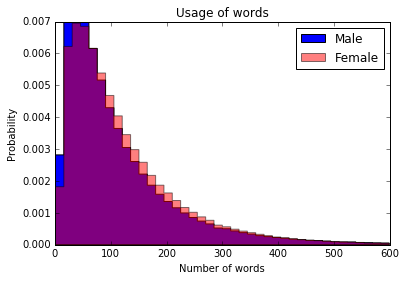

In [19]:
plt.hist([n for n in m_num_word_dist if n <600], bins=40, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in f_num_word_dist if n <600], bins=40, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of words")
plt.xlabel("Number of words")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [20]:
m_avg = sum(m_num_word_dist) / float(len(m_num_word_dist))
f_avg = sum(f_num_word_dist) / float(len(f_num_word_dist))

In [21]:
print "Male_AVG", m_avg
print "Female_AVG", f_avg

Male_AVG 114.891708316
Female_AVG 124.155503035


### 2. Number of sentences

In [ ]:
def num_sentences_dist(review_set):
    ret = []
    for review in review_set:
        n = len(review['text_blob'].sentences)
        ret.append(n)
    return ret

m_num_sen_dist = num_sentences_dist(m_reviews)
f_num_sen_dist = num_sentences_dist(f_reviews)

In [34]:
import timeit
def test():
    text = '''
    The titular threat of The Blob has always struck me as the ultimate movie
    monster: an insatiably hungry, amoeba-like mass able to penetrate
    virtually any safeguard, capable of--as a doomed doctor chillingly
    describes it--"assimilating flesh on contact.
    Snide comparisons to gelatin be damned, it's a concept with the most
    devastating of potential consequences, not unlike the grey goo scenario
    proposed by technological theorists fearful of
    artificial intelligence run rampant.
    '''
    blob = TextBlob(text)
    p= blob.tags
    
timeit.timeit(test, number=10000)

58.65041518211365

In [31]:
len(f_reviews)

867385

In [ ]:
blob.